In [2]:
import pickle

import numpy as np
import pandas as pd

In [16]:
# Load data (2 - '.'단위로 문장 스플릿)

# keywords set
with open("../Dataset/JF_data.pickle", "rb") as fr:
    JF_data = pickle.load(fr)

 # news summarize (sentences)
all_sentences = pd.read_csv('../Dataset/NewsSentence_2.csv')

JF_sentences = all_sentences[all_sentences['date'] < 20200301]
JF_sentences = JF_sentences[JF_sentences['sentences'] != '']

JF_all = pd.concat([JF_data, JF_sentences.iloc[:,2]], axis=1)
JF_all.drop(['keywords'], axis=1, inplace=True)
JF_all.shape

(7063, 5)

In [17]:
JF_all.head(2)

date      category                                   title  \
0  20200101  popular/news  진중권 "조국일가 사건, 캐도캐도 나오는 '고구마'..농부가 덮겠나"   
1  20200101  popular/news       올해 건강검진은 해 넘기지 마세요..과태료 '5만→10만원'   

                                 keywords_list  \
0   [교수, 장관, 비판, 인디언, 동양, 기우제, 일부, 최근, 친문, 세력]   
1  [건강, 검진, 가입자, 올해, 공단, 국가, 노동자, 과태료, 지사, 대상]   

                                           sentences  
0  진 전 교수는 1일 오후 1시쯤 자신의 페이스북에 인디언 기우제가 아니라 고구마 캐...  
1              국가건강검진에는 일반건강검진과 암 검진, 영유아 건강검진 등이 있다

In [ ]:
# => '1~2월 카테고리: covid19, 검찰, 총선'으로 결정
#   선택 키워드: covid19) covid19, 검찰) 검찰, 총선) '대표'로 지정하여 추출

In [18]:
# 키워드셋에 맞는 데이터 추출 (2)

def categories_data(month_data, keyword_list):
    result = []
    for index in range(len(month_data)):
        if set(keyword_list).issubset(month_data['keywords_list'][index]):
            select_dict = {}
            select_dict['title'] = month_data['title'][index]
            select_dict['keywords'] = month_data['keywords_list'][index]
            select_dict['sentence'] = month_data['sentences'][index]

            result.append(select_dict)

    result = pd.DataFrame(result)
    return result

In [29]:
covid19_news = categories_data(JF_all, ['covid19'])
prosc_news = categories_data(JF_all, ['검찰'])
elect_news = categories_data(JF_all, ['대표', '선거'])

In [30]:
print('covid19 카테고리 데이터 개수: ', covid19_news.shape)
print('검찰 카테고리 데이터 개수: ', prosc_news.shape)
print('총선 카테고리 데이터 개수: ', elect_news.shape)

covid19 카테고리 데이터 개수:  (941, 3)
검찰 카테고리 데이터 개수:  (818, 3)
총선 카테고리 데이터 개수:  (697, 3)


In [31]:
# save data (pickle)

with open("../Dataset/covid19_JF.pickle","wb") as fw:
    pickle.dump(covid19_news, fw)
    
with open("../Dataset/procs_JF.pickle","wb") as fw:
    pickle.dump(prosc_news, fw)

with open("../Dataset/elect_JF.pickle","wb") as fw:
    pickle.dump(elect_news, fw)

### [문장 군집화 진행- k개수 확인]

/home/yooso/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9903e76a0>,
                 k=None, model=None)

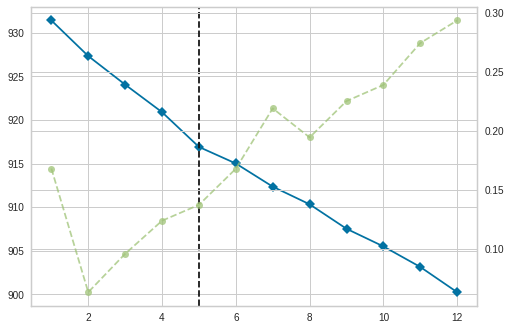

In [25]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import KElbowVisualizer

# covid19
covid19_news = covid19_news.dropna()
tfidf_vect = TfidfVectorizer()
fit_vec = tfidf_vect.fit_transform(covid19_news['sentence'])

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,13))
visualizer.fit(fit_vec)

/home/yooso/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/yooso/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/home/yooso/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe97c0d0bb0>,
                 k=None, model=None)

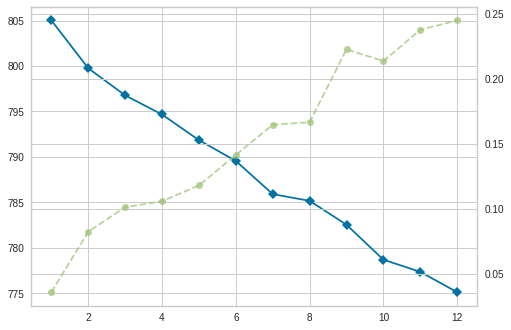

In [36]:
# prosc_news
prosc_news = prosc_news.dropna()
fit_vecP = tfidf_vect.fit_transform(prosc_news['sentence'])

visualizer = KElbowVisualizer(model, k=(1,13))
visualizer.fit(fit_vecP)

/home/yooso/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe97c0e4eb0>,
                 k=None, model=None)

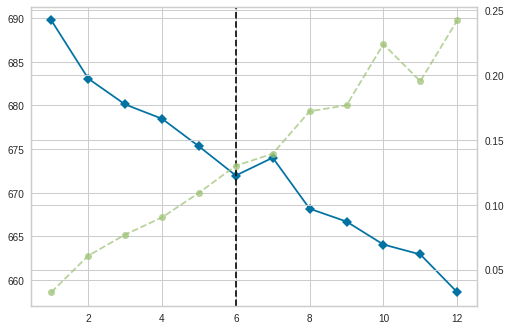

In [37]:
# elect_news

elect_news = elect_news.dropna()
fit_vecE = tfidf_vect.fit_transform(elect_news['sentence'])

visualizer = KElbowVisualizer(model, k=(1,13))
visualizer.fit(fit_vecE)